In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, PoissonRegressor
from inference import COSMIC, EM, EM_with_clock

In [2]:
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)
#font = {'weight': 'normal',
#        'size': 12,
#        'family': 'normal'}
#plt.rc('font', **font)
#plt.show()
#plt.rcParams['figure.dpi'] = 96

In [3]:
filename = 'data/germline.csv.gz'
df = pd.read_csv(filename,low_memory=False)
df.dropna(subset=['PhasingProba','MotherAgeAtBirth','FatherAgeAtBirth'],inplace=True)
loc =  df.Phase=='father'
loc &= df.PhasingProba>0.95
df = df.loc[loc]

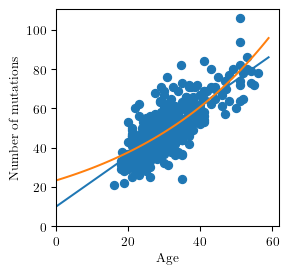

In [4]:
sampleName ='Proband'
ageName = 'FatherAgeAtBirth'
df.reset_index(drop=True,inplace=True)
xy = df.groupby([sampleName])
x = xy.first()[ageName]
y = xy.size()

id_link = LinearRegression()
id_link.fit(x.values.reshape(-1, 1),y)
log_link = PoissonRegressor()
log_link.fit(x.values.reshape(-1, 1),y)

plt.figure(figsize=(3,3))
t = np.arange(0,60,1)
plt.scatter(x,y)
plt.plot(t,id_link.predict(t.reshape(-1, 1)))
plt.plot(t,log_link.predict(t.reshape(-1, 1)))
plt.ylabel('Number of mutations')
plt.xlabel('Age')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

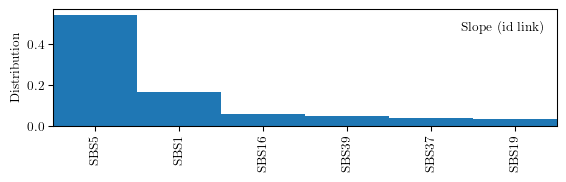

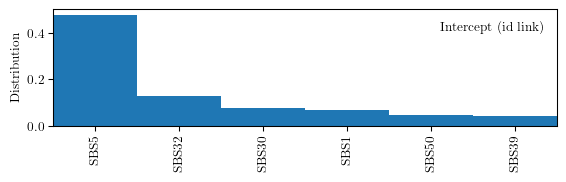

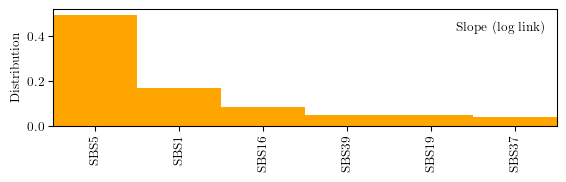

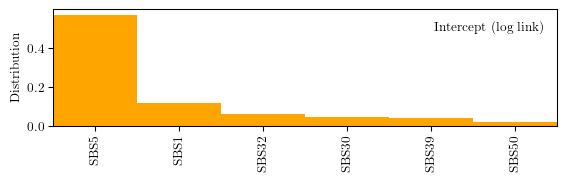

In [5]:
id_attribution = EM_with_clock(df=df,
                               cosmic=COSMIC(), 
                               intercept=id_link.intercept_,
                               slope=id_link.coef_[0],
                               ageLabel='FatherAgeAtBirth')
em = EM(df,COSMIC())
em.theta = id_attribution[1]
em.plot(first=6,title='Slope (id link)')
em.theta = id_attribution[0]
em.plot(first=6,title='Intercept (id link)')
log_attribution = EM_with_clock(df=df,
                                cosmic=COSMIC(), 
                                intercept=log_link.intercept_,
                                slope=log_link.coef_[0],
                                link='log',
                                ageLabel='FatherAgeAtBirth')
em.theta = log_attribution[1]
em.plot(first=6,title='Slope (log link)',color='orange')
em.theta = log_attribution[0]
em.plot(first=6,title='Intercept (log link)',color='orange')